In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator


In [5]:
Sp_data = pd.read_csv('./SuperSt_data.csv')

In [6]:
dup_id = Sp_data['Id']
check = dup_id.duplicated()
for item in check:
    if item:
        print(True)
    

In [7]:
Sp_data['Sum_Price'].describe()

count    2205.000000
mean      606.821769
std       601.675284
min         5.000000
25%        69.000000
50%       397.000000
75%      1047.000000
max      2525.000000
Name: Sum_Price, dtype: float64

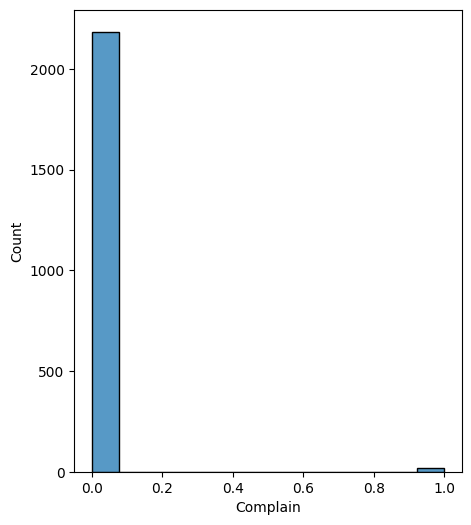

In [194]:
compl = Sp_data['Complain']
plt.figure(figsize=(5,6))
sns.histplot(data=compl)
plt.show()

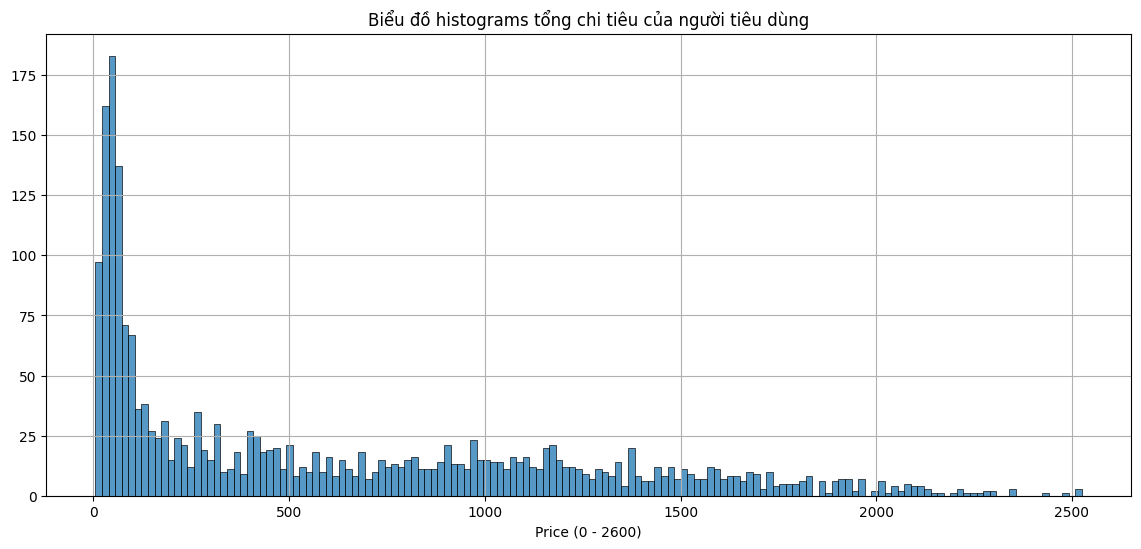

In [8]:
plt.figure(figsize=(14,6))
sns.histplot(x=Sp_data['Sum_Price'], data=Sp_data, bins=150)
plt.xlabel("Price (0 - 2600)")
plt.ylabel("")
plt.title("Biểu đồ histograms tổng chi tiêu của người tiêu dùng")
plt.grid(visible=True)
plt.show()

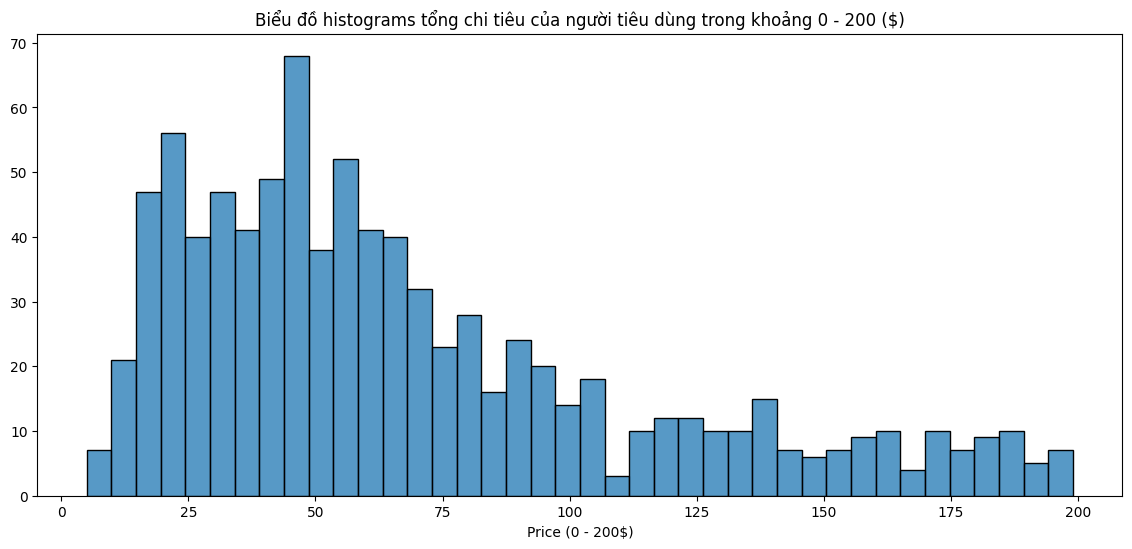

In [9]:
Sum_Price500 = Sp_data[Sp_data['Sum_Price'] < 200]
plt.figure(figsize=(14,6))
sns.histplot(x=Sum_Price500['Sum_Price'], data=Sum_Price500, bins=40)
plt.xlabel("Price (0 - 200$)")
plt.ylabel("")
plt.title("Biểu đồ histograms tổng chi tiêu của người tiêu dùng trong khoảng 0 - 200 ($)")
plt.show()

- Ta thấy giá trị trung bình và giá trị của độ lệch chuẩn xấp xỉ bằng nhau, nghĩa là mức độ phân bổ của biểu đồ trên tương đối lớn

&#8594; trong tập dữ liệu, khoảng chi tiêu của khách hàng phân bổ khá rộng, cho ta thấy tập dữ liệu có thể chứa nhiều tệp khách hàng.

- trong khoảng từ 0 - 100$ số lượng khách bỏ lượng tiền chi tiêu trong khoảng này khá cao hơn nhiều so với các mức còn lại. biểu đồ bên dưới cho ta thấy số  lượng khách hàng qua mức chi tiêu 

&#8594; Giá bán mặt hàng càng thấp, lượng người mua thường nhiều hơn


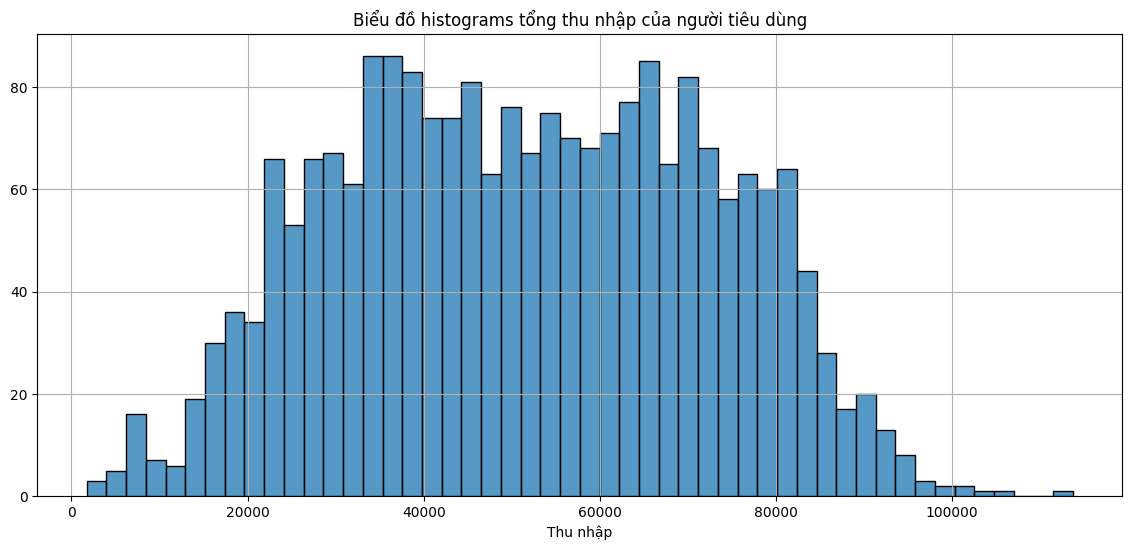

In [172]:
plt.figure(figsize=(14,6))
sns.histplot(x=Sp_data['Income'], data=Sp_data, bins=50)
plt.xlabel("Thu nhập")
plt.ylabel("")
plt.title("Biểu đồ histograms tổng thu nhập của người tiêu dùng")
plt.grid(visible=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

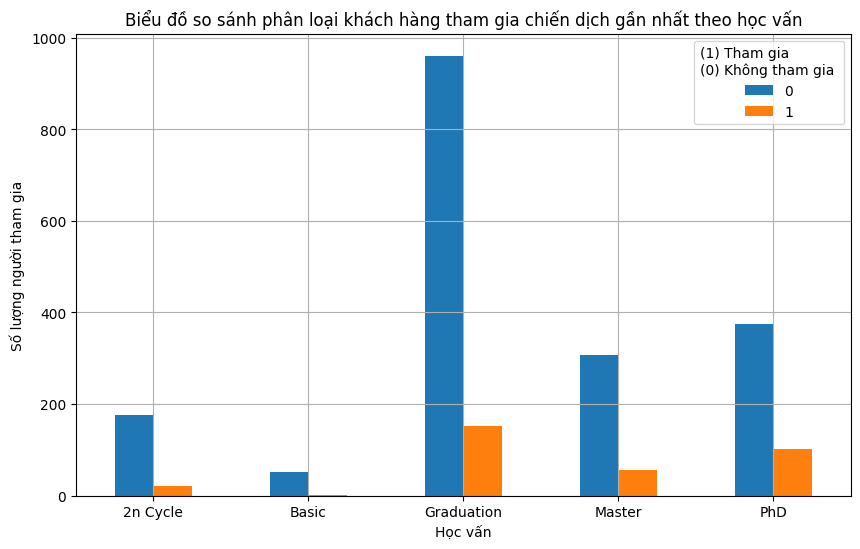

In [185]:
edu_data = Sp_data[Sp_data['Response'].isin([0, 1])][['Education','Response']]
edu_data = edu_data.groupby("Education")['Response'].value_counts().unstack(fill_value=0)
edu_data.plot(kind='bar', figsize=(10, 6), xlabel="Học vấn", ylabel="Số lượng người tham gia")
plt.xticks(rotation=0)
plt.grid(visible=True)
plt.legend(title= "(1) Tham gia\n(0) Không tham gia ")
plt.title('Biểu đồ so sánh phân loại khách hàng tham gia chiến dịch gần nhất theo học vấn')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

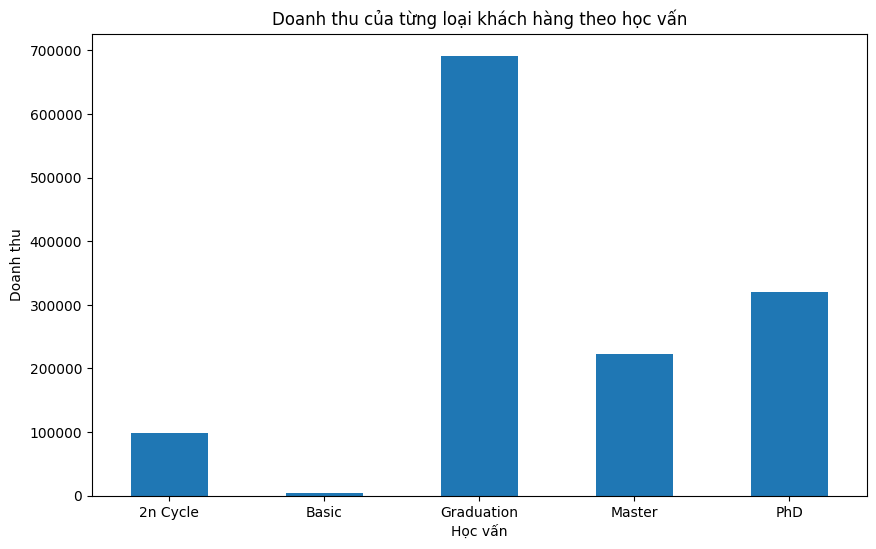

In [184]:
edu_data = Sp_data[['Education','Sum_Price']]
edu_data = edu_data.groupby("Education")['Sum_Price'].sum()
edu_data.plot(kind='bar', figsize=(10, 6), xlabel="Học vấn", ylabel="Doanh thu")
plt.xticks(rotation=0)
plt.title('Doanh thu của từng loại khách hàng theo học vấn')
plt.show

<Figure size 1400x1400 with 0 Axes>

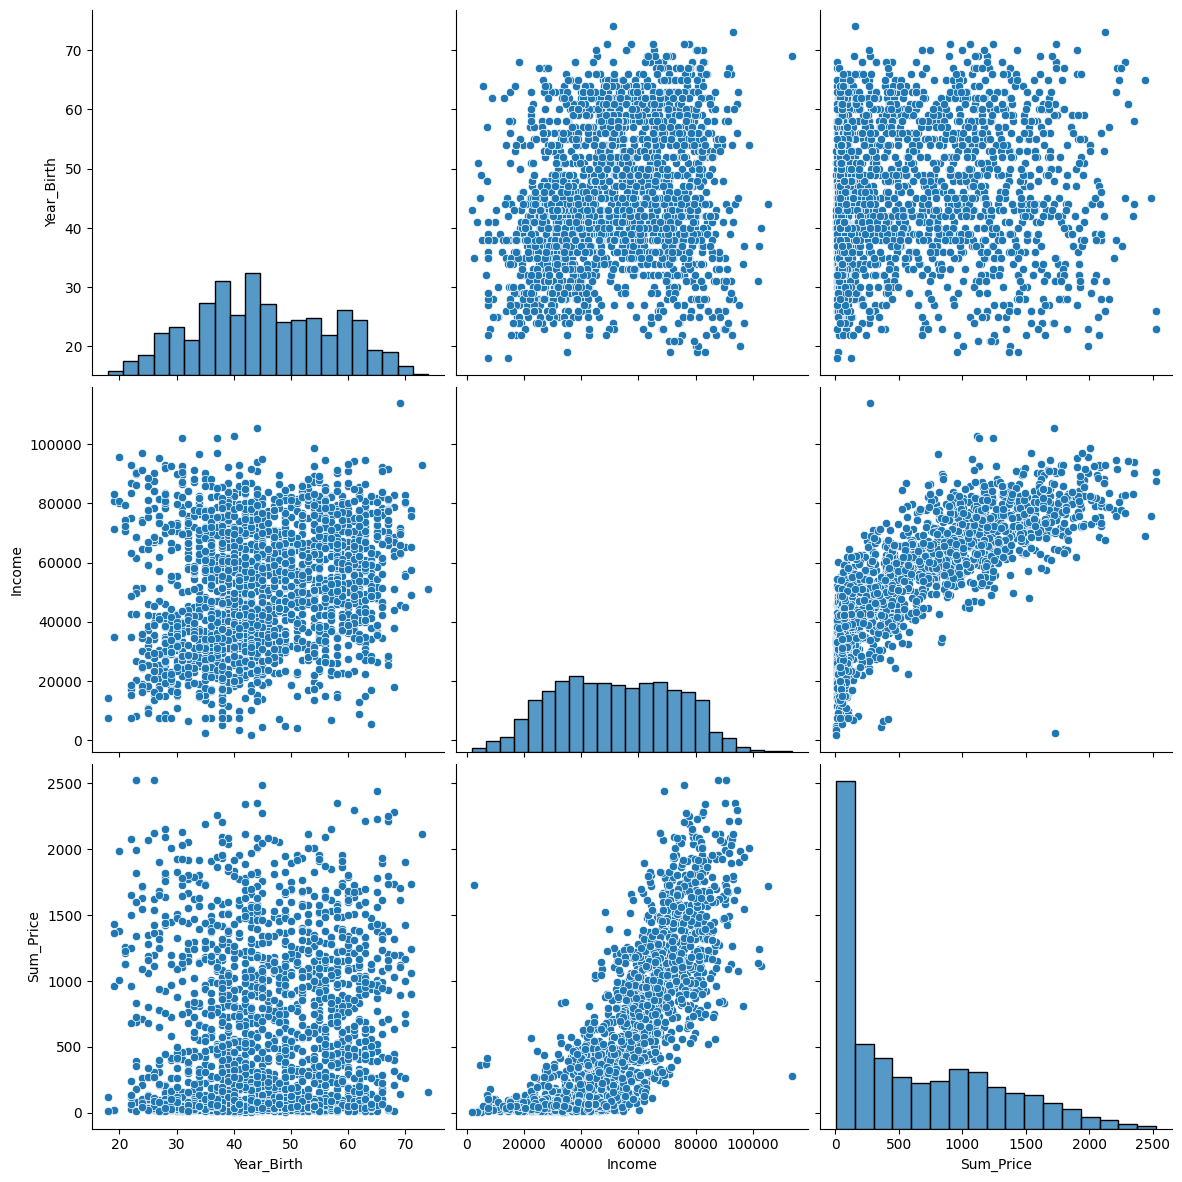

In [12]:

Linearity_data = Sp_data.loc[:,['Year_Birth', 'Income','Sum_Price']]
plt.figure(figsize=(14,14))
sns.pairplot(Linearity_data, height=4 )
plt.show()

- 2 biến tỉ lệ thuận với nhau đó là `Income` và `Sum_Price
- nhìn vào biểu đồ ta thấy, tổng quán giữa 2 biến `Income` và `Sum_Price` là tỉ lệ thuận nhưng theo một cách phức tạp.
- ta thấy thu nhập từ khoảng 30000 trở lại, việc chi tiêu mua sắm sẽ rất rất ảm đạm, với mức thu nhập dao động từ 0 - 30000 lượng tiền chi tiêu dự đoán vào khoảng 0 - 500, tức dưới mức 20% so với phần còn lại

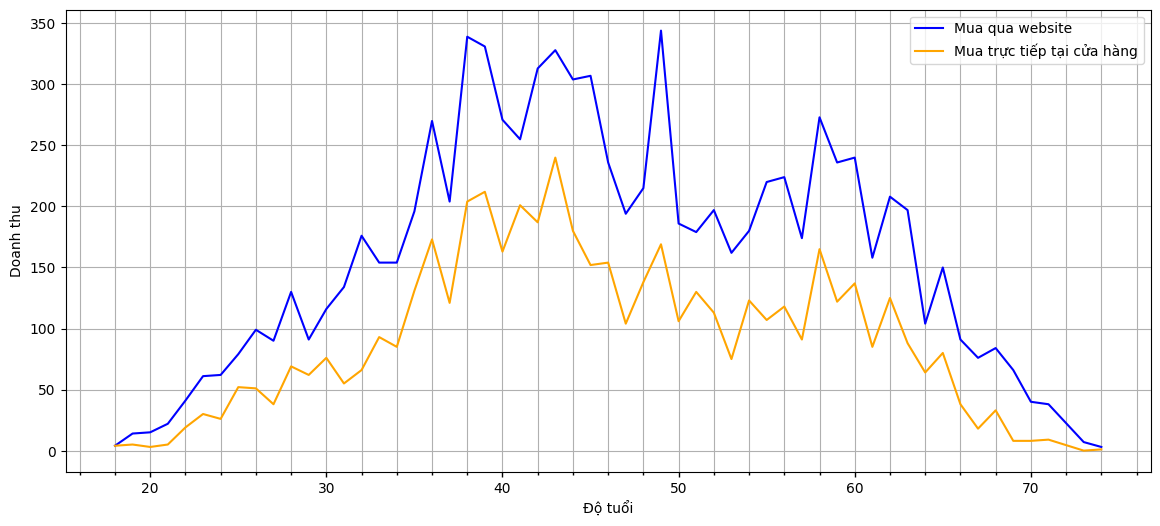

In [13]:
NumWebPurchases = "Mua qua website"
NumStorePurchases = "Mua trực tiếp tại cửa hàng"
numdeal = Sp_data.loc[:,['NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'Year_Birth']]
numdeal = numdeal.groupby('Year_Birth').sum().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(data=numdeal, x='Year_Birth', y='NumWebPurchases', color= "blue", label=NumWebPurchases)
sns.lineplot(data=numdeal, x='Year_Birth', y='NumDealsPurchases', color= "orange", label=NumStorePurchases)
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='x', which='both', width=1)
plt.ylabel("Doanh thu")
plt.xlabel("Độ tuổi")

plt.grid(visible=True, which='both')
plt.show()

In [14]:
des_inout = Sp_data.loc[:, ['Sum_Price', 'Income']]
des_inout.describe()

,Sum_Price,Income
count,2205.000000,2205.000000
mean,606.821769,51622.094785
std,601.675284,20713.063826
min,5.000000,1730.000000
25%,69.000000,35196.000000
50%,397.000000,51287.000000
75%,1047.000000,68281.000000
max,2525.000000,113734.000000


In [15]:
per_of_Price = (des_inout['Sum_Price']/des_inout['Income']) * 100
per_price_with_sale = (499 / des_inout['Sum_Price'] ) * 100


`per_of_Price` :  % chi tiêu so với tổng thu nhập trong lịch sử của khách hàng.
- Trung bình chỉ chiếm chưa tới 1%

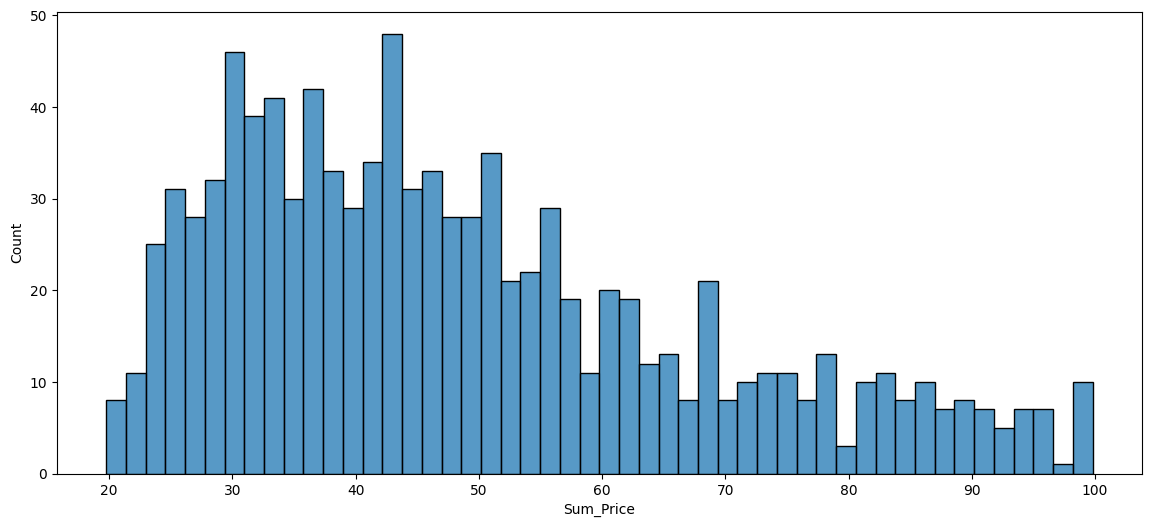

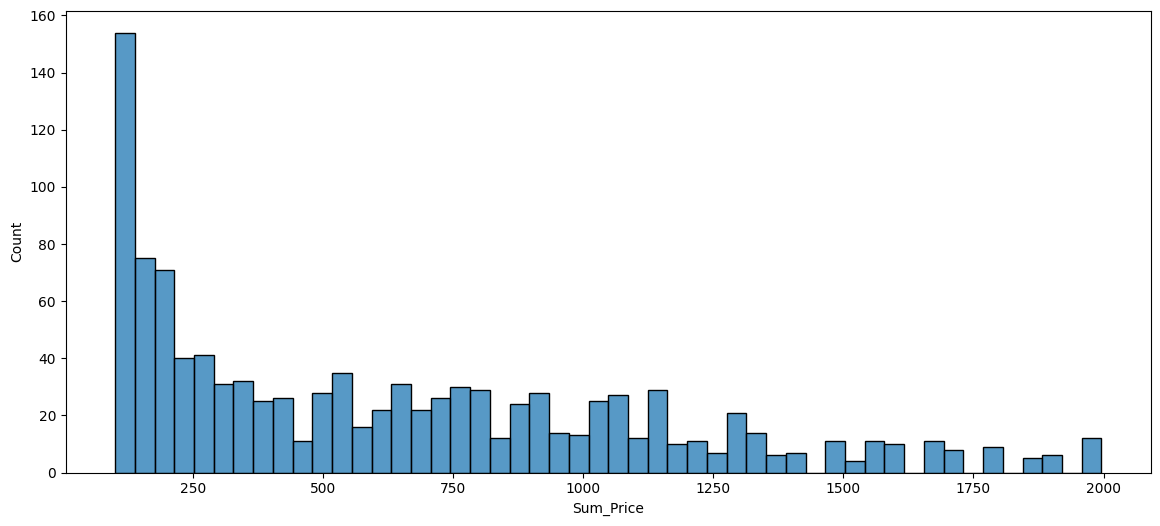

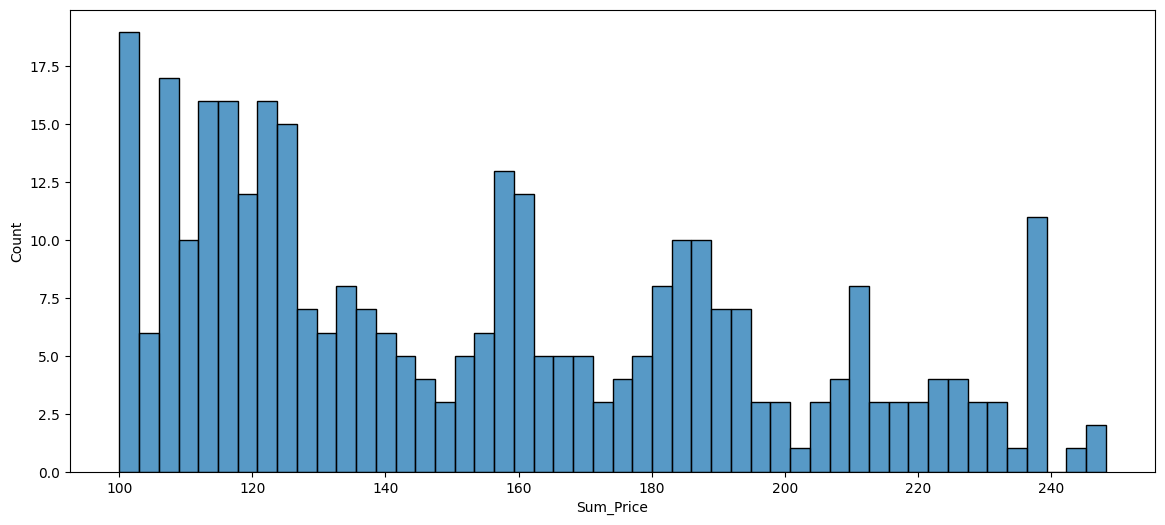

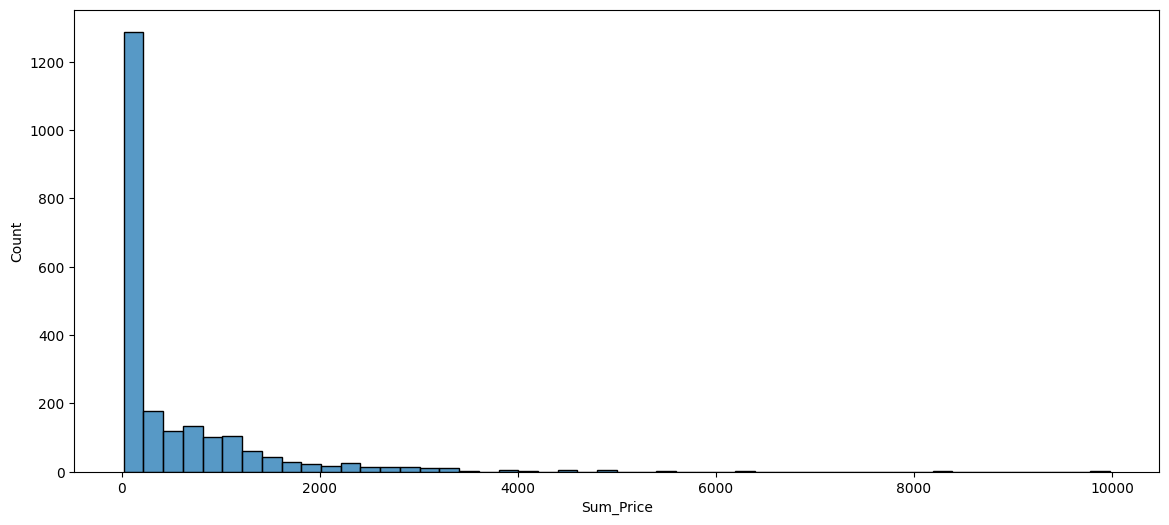

In [16]:
hist_per = per_price_with_sale[per_price_with_sale < 100]
hist_per_over100 = per_price_with_sale[(per_price_with_sale >= 100) & (per_price_with_sale < 2000)]

plt.figure(figsize=(14,6))
sns.histplot(data=hist_per, bins=50)
plt.show()

plt.figure(figsize=(14,6))
sns.histplot(data=hist_per_over100, bins=50)
plt.show()


plt.figure(figsize=(14,6))
sns.histplot(data=per_price_with_sale[(per_price_with_sale >= 100) & (per_price_with_sale < 250)], bins=50)
plt.show()


plt.figure(figsize=(14,6))
sns.histplot(data=per_price_with_sale, bins=50)
plt.show()


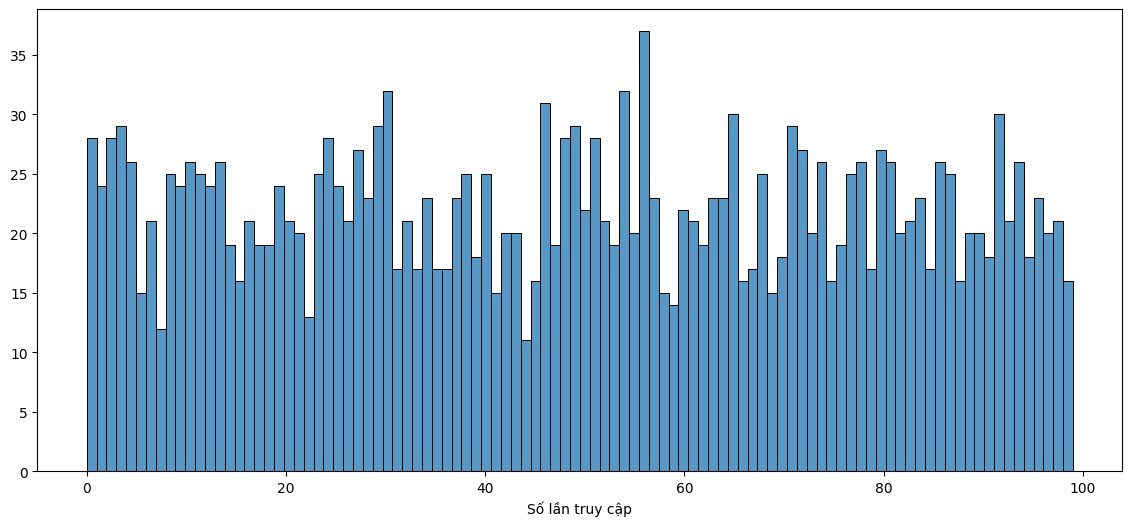

In [17]:
Recency = Sp_data['Recency']
plt.figure(figsize=(14,6))
sns.histplot(data=Recency, bins=100)
plt.xlabel("Số lần truy cập")
plt.ylabel("")
plt.show()

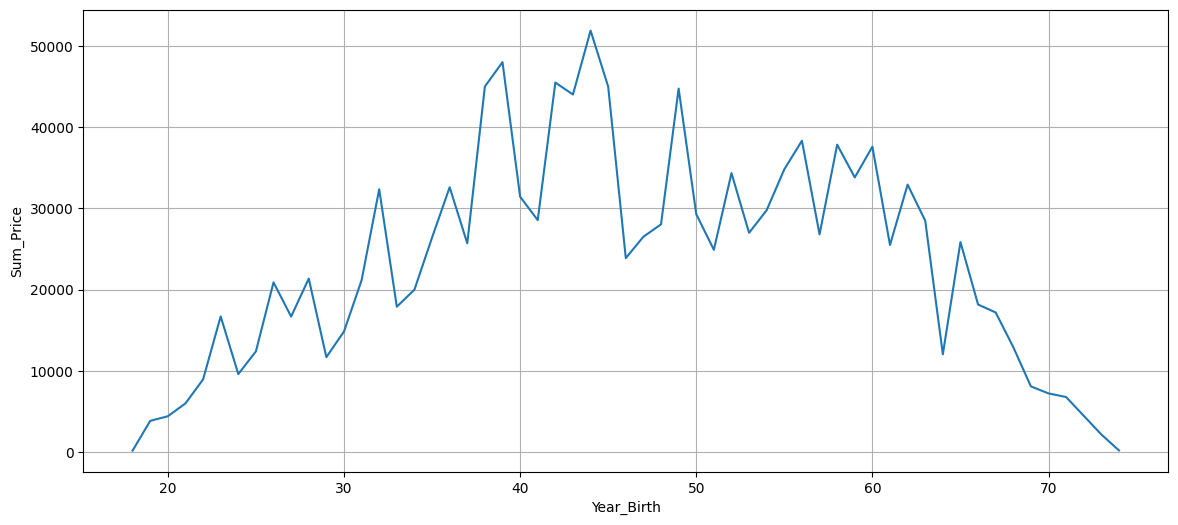

In [18]:

Recency_by_yb = Sp_data.loc[:,['Sum_Price', 'Year_Birth']]
Recency_by_yb = Recency_by_yb.groupby('Year_Birth').sum().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(data=Recency_by_yb, y='Sum_Price', x='Year_Birth')
plt.grid(visible=True)
plt.show()

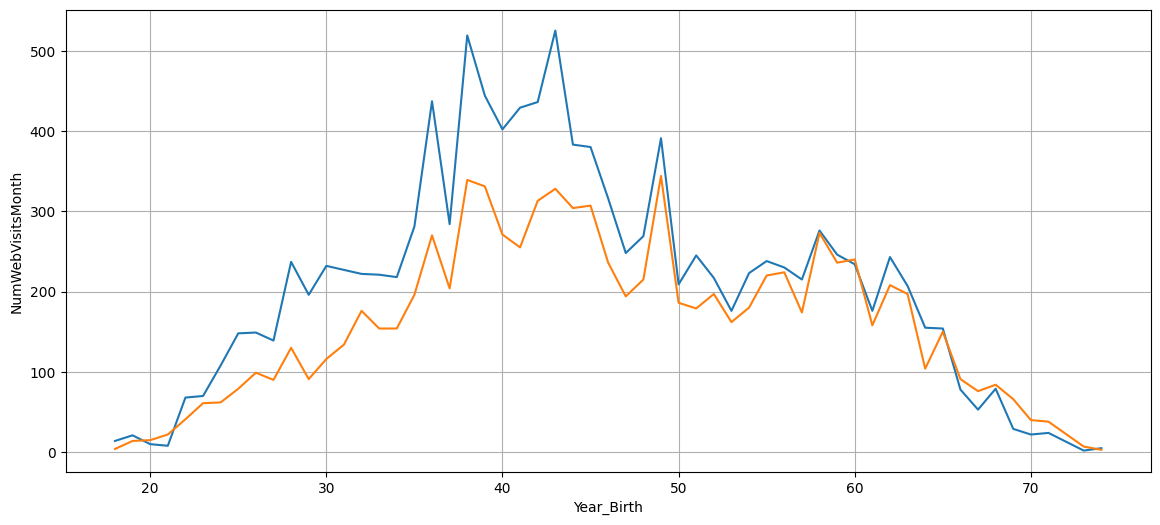

In [19]:
Recency_by_yb = Sp_data.loc[:,['NumWebVisitsMonth', 'Year_Birth']]
NumStorePurchases = Sp_data.loc[:,['NumWebPurchases', 'Year_Birth']]

Recency_by_yb = Recency_by_yb.groupby('Year_Birth').sum().reset_index()
NumStorePurchases = NumStorePurchases.groupby('Year_Birth').sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=Recency_by_yb, y='NumWebVisitsMonth', x='Year_Birth')
sns.lineplot(data=NumStorePurchases, y='NumWebPurchases', x='Year_Birth')
plt.grid(visible=True, which='both')
plt.show()

In [ ]:

Linearity_data = Sp_data.loc[:,['Year_Birth', 'Income','Sum_Price', 'Recency', ]]
plt.figure(figsize=(14,14))
sns.pairplot(Linearity_data, height=4)
plt.show()

<Figure size 1400x1400 with 0 Axes>

&#8594; Thu nhập và chi tiêu có sự tương quan mạnh với nhau

&#8594; khi thu nhập của khách hàng càng cao, lượng chi tiêu mua sắm của họ có xu hướng cao hơn


In [ ]:
Response = Sp_data.loc[:, ["Sum_Price", 'Response']]
Response_1 = Response[Response['Response'] == 1]
Response_0 = Response[Response['Response'] == 0]

Response_1_sum = Response_1['Sum_Price'].sum()
Response_1_res_sum = Response_1['Response'].sum()
Response_0_sum = Response_0['Sum_Price'].sum()
Response_0_res_sum = Response_0['Response'].count()
values_sum_price = [Response_1_sum, Response_0_sum]
values_response_count = [Response_1_res_sum, Response_0_res_sum]
labels = ['Chấp thuận', 'Không chấp thuận']

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Response')
ax1.set_ylabel('Sum Price', color=color)
bars = ax1.bar(labels, values_sum_price, color=color)

ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Response Count', color=color)
ax2.plot(labels, values_response_count, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Lượng chi trả giữa 2 nhóm người tham gia sự kiện')
plt.show()

In [ ]:
res_df = Sp_data.loc[:,['Response']]
Res_count = res_df.count()
Res_cout_1 = res_df[res_df['Response'] == 1]
Res_cout_1 = Res_cout_1.count()
Res_cout_0 = res_df[res_df['Response'] == 0]
Res_cout_0 = Res_cout_0.count()
Res_cout_1 = (Res_cout_1/Res_count)*100 
Res_cout_0 = 100 - Res_cout_1
print("Những người chấp thuận chiến dịch gần nhất chiếm ",Res_cout_1['Response'] )
print("Những người không chấp thuận chiến dịch gần nhất chiếm ",Res_cout_0['Response'] )


những người chấp thuật chiến dịch gần nhất có mua hàng nhiều hơn so với những người không chấp thuật chiến dịch mua hàng hay không?

$Ho$ trung bình người chấp thuận chiến dịch trả tiền cao hơn so với người không chấp thuận chiến dịch

$Ha$ trung bình người chấp thuận chiến dịch trả tiền thấp hơn hoặc bằng so với người không chấp thuận chiến dịch

&#8594; Significance = 0.05

In [ ]:
res_df = Sp_data.loc[:,['Response', 'Sum_Price']]
res_sample_1 = res_df[res_df['Response'] == 1].sample(n = 300, replace=False)
res_sample_0 = res_df[res_df['Response'] == 0].sample(n = 300, replace=False)
tstat, pvalue = stats.ttest_ind(a=res_sample_1['Sum_Price'], b=res_sample_0['Sum_Price'], alternative="greater")
print(tstat)
print(pvalue)

- Với $Pvalue = 1.3736188655474714e...$ > $0.05 $

&#8594; giữ lại giả thuyết $Ho$

&#8594; giữ lại giả thuyết trung bình của người không tham gia chương trình gần nhất có trung bình mua cao hơn so với người mua